# Исследование объявлений о продаже квартир

Имеется архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет сервиса Яндекс.Недвижимость. Нужно научиться определять рыночную стоимость объектов недвижимости. 

Цель исследования — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Датафрейм содержит 23,7 тысяч строк и 22 столбца. 
Столбецы floor_total, last_price, living_area, kitchen_area, total_area содержат данные не целочисленного типа. Имеются многочисленные пропуски.


### Шаг 2. Предобработка данных

In [3]:
data.isnull().sum().sort_values(ascending=False)

#Приведен список с кол-вом пропусков в столбцах. 

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
last_price                  0
total_area                  0
studio                      0
rooms                       0
floor                       0
open_plan                   0
total_images                0
dtype: int64

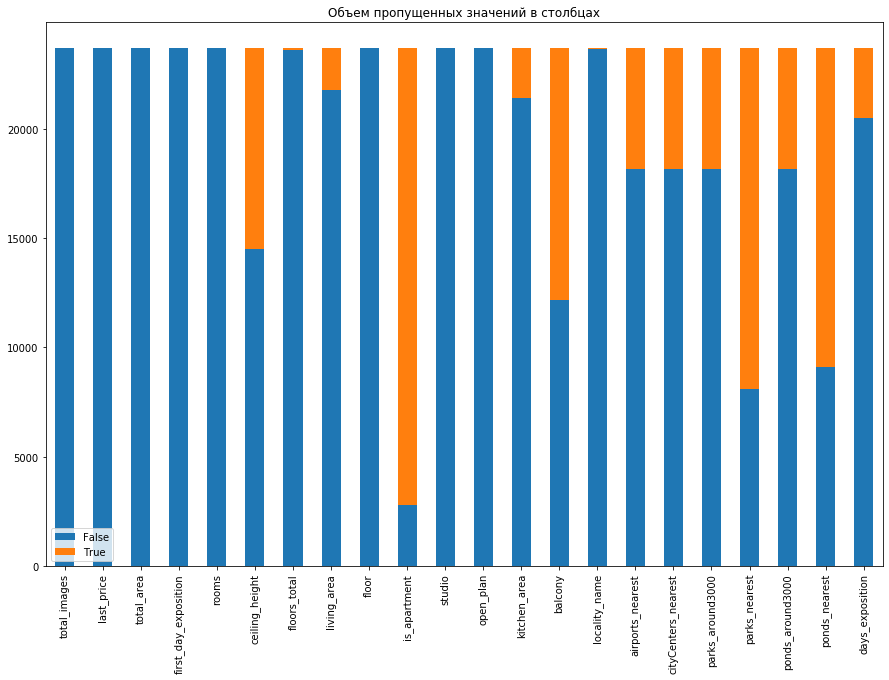

In [4]:
import matplotlib.pyplot as plt

data.isna().apply(pd.Series.value_counts).transpose().plot(kind = 'bar', stacked = True, figsize = (15,10), title='Объем пропущенных значений в столбцах')
plt.legend(loc='lower left')

#Гистограмма по доли пропусков в столбцах. Синий – имеющиеся данные, оранжевый – пропуски. 

In [5]:
data[data.isnull().any(axis=1)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
data['first_day_exposition'] = pd.to_datetime(data.first_day_exposition, format= '%Y/%m/%d')
data['first_day_exposition']

#Значения столбца 'first_day_exposition' переделаны в формат даты.

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [7]:
data['balcony'].fillna(0, inplace=True)
data['living_area'].fillna(0, inplace=True)
data['kitchen_area'].fillna(0, inplace=True)

#Заменены пустые значения в столбцах 'balcony', 'living_area', 'kitchen_area' на 0. 

Пустые значение в столбце 'balcony' могут означать отсутствие балкона, поэтому такие значения изменены на 0. В остальных столбцах эти изменения нужны для подстановки средних значений в зависимости от локации.

In [8]:
data['ceiling_height']=(
    data['ceiling_height']
    .where((data['ceiling_height']<20), data['ceiling_height']/10)
) 
data.sort_values(by=['ceiling_height'], ascending=False)

#В столбце 'ceiling_height' имеются выбросы: высота потолка больше 20 метров. Вероятно, это ошибка. 
#Ошибки обнаружены и разделены на 10.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,5600000.0,56.4,2018-05-11,2,14.0,14.0,32.4,5,NaN,...,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
22309,20,5300000.0,45.0,2017-09-30,1,10.3,16.0,15.5,15,NaN,...,0.0,0.0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22869,0,15000000.0,25.0,2018-07-25,1,10.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,NaN,...,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,7.3,0.0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19,2,NaN,5.0,31.0,2,NaN,...,6.0,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07,1,NaN,5.0,17.5,4,NaN,...,6.0,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,8.5,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [9]:
data_ceiling_height = data.groupby('locality_name')['ceiling_height'].median()
        
for locality_name in data_ceiling_height.index:
    data.loc[(data['ceiling_height'].isnull()) & (data['locality_name'] == locality_name), 'ceiling_height'] = data_ceiling_height.loc[locality_name]
display(data.head(10))

#Заполнены пропуски в столбце ceiling_height исходя из медиального значения высоты потолка в каждой локации.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.63,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,0.00,9,NaN,...,0.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.60,12.0,14.40,5,NaN,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.64,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,0.00,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,NaN,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [10]:
data_floors_total = data.groupby('locality_name')['floors_total'].median()
        
for locality_name in data_ceiling_height.index:
    data.loc[(data['floors_total'].isnull()) & (data['locality_name'] == locality_name), 'floors_total'] = data_ceiling_height.loc[locality_name]

display(data.head(10))

#Заполнены пропуски в столбце floors_total исходя из медиального значения количества этажей в домах каждой локации.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.63,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,0.00,9,NaN,...,0.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.60,12.0,14.40,5,NaN,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.64,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,0.00,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,NaN,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [11]:
data_living_area = data.groupby('locality_name')['living_area'].median()
        
for locality_name in data_living_area.index:
    data.loc[(data['living_area'].isnull()) & (data['locality_name'] == locality_name), 'living_area'] = data_living_area.loc[locality_name]

display(data.head(10))

#Заполнены пропуски в столбце living_area исходя из медиального значения жилой площади в квартирах каждой локации.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.63,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,0.00,9,NaN,...,0.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.60,12.0,14.40,5,NaN,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.64,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,0.00,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,NaN,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [12]:
data_kitchen_area = data.groupby('locality_name')['kitchen_area'].median()
        
for locality_name in data_kitchen_area.index:
    data.loc[(data['kitchen_area'].isnull()) & (data['locality_name'] == locality_name), 'kitchen_area'] = data_kitchen_area.loc[locality_name]

display(data.head(10))

#Заполнены пропуски в столбце kitchen_area исходя из медиального значения площади кухни в квартирах каждой локации.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.63,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,0.00,9,NaN,...,0.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.60,12.0,14.40,5,NaN,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.64,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,0.00,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,NaN,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [13]:
data['floors_total'].isnull().value_counts()
data['floors_total'].fillna(0, inplace=True)
data['floors_total'].isnull().value_counts()

#Пустые значения в столбце 'floors_total' заменены на нули.

False    23699
Name: floors_total, dtype: int64

In [14]:
data['floors_total'] = data['floors_total'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data['living_area'] = data['living_area'].astype('int')
data['kitchen_area'] = data['kitchen_area'].astype('int')
data['total_area'] = data['total_area'].astype('int')

#изменение типов данных в целочисленный формат.

### Вывод

Мы выявили и обработали пропуски в столбцах floors_total, living_area, kitchen_area – теперь в пустых ячейках содержатся средние значения исходя из города, где расположена квартира. Вероятно данные были утеряны при выгрузке или произошла ошибка при заносе данных.
Пропуски в столбце balcony могут говорить не только об отсутствии данных, но скорее об отсутствии балкона, поэтому были заменены на 0.
Столбец first_day_exposition был преобразован в формат даты.

### Шаг 3. Посчитайте и добавьте в таблицу

In [15]:
data['price_per_metre'] = (data['last_price'] / data['total_area']).astype('int')
data.head(10)

#Посчитана цена за квадратный метр для каждой строки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370
1,7,3350000,40,2018-12-04,1,2.63,11,18,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,83750
2,10,5196000,56,2015-08-20,2,2.70,5,34,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785
3,0,64900000,159,2015-07-24,3,2.70,14,0,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000
5,10,2890000,30,2018-09-10,1,2.60,12,14,5,NaN,...,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,96333
6,6,3700000,37,2017-11-02,1,2.64,26,10,6,NaN,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,100000
7,5,7915000,71,2019-04-18,2,2.70,24,0,22,NaN,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,111478
8,20,2900000,33,2018-05-23,1,2.70,27,15,26,NaN,...,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87878
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,NaN,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524


In [16]:
data['price_per_metre'].median()
#Средняя стоимость за квадратный метр – 94318 руб.

95454.0

In [17]:
data['day_of_week'] = data['first_day_exposition'].dt.weekday_name
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.head(10)

#Добавлены столбцы с данными о дне недели, месяце и годе публикации объявления.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,day_of_week,month,year
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,Thursday,3,2019
1,7,3350000,40,2018-12-04,1,2.63,11,18,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,83750,Tuesday,12,2018
2,10,5196000,56,2015-08-20,2,2.70,5,34,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,Thursday,8,2015
3,0,64900000,159,2015-07-24,3,2.70,14,0,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,Friday,7,2015
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,Tuesday,6,2018
5,10,2890000,30,2018-09-10,1,2.60,12,14,5,NaN,...,NaN,NaN,NaN,NaN,NaN,55.0,96333,Monday,9,2018
6,6,3700000,37,2017-11-02,1,2.64,26,10,6,NaN,...,19143.0,0.0,NaN,0.0,NaN,155.0,100000,Thursday,11,2017
7,5,7915000,71,2019-04-18,2,2.70,24,0,22,NaN,...,11634.0,0.0,NaN,0.0,NaN,NaN,111478,Thursday,4,2019
8,20,2900000,33,2018-05-23,1,2.70,27,15,26,NaN,...,NaN,NaN,NaN,NaN,NaN,189.0,87878,Wednesday,5,2018
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,NaN,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524,Sunday,2,2017


In [18]:
data.sort_values(by = ['floor'], ascending = False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,day_of_week,month,year
18218,4,9900000,101,2018-09-27,3,2.7,35,53,33,NaN,...,20450.0,0.0,NaN,3.0,72.0,7.0,98019,Thursday,9,2018
11575,9,9900000,101,2016-04-28,3,2.7,33,53,32,False,...,20444.0,0.0,NaN,3.0,80.0,53.0,98019,Thursday,4,2016
18629,20,5700000,54,2017-12-08,1,2.7,35,21,31,NaN,...,20444.0,0.0,NaN,3.0,80.0,128.0,105555,Friday,12,2017
1917,13,10150000,74,2017-11-17,2,2.8,35,34,30,NaN,...,20444.0,0.0,NaN,3.0,80.0,NaN,137162,Friday,11,2017
11079,16,9200000,75,2019-02-22,2,2.7,36,40,29,NaN,...,20444.0,0.0,NaN,3.0,80.0,NaN,122666,Friday,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14177,8,2700000,36,2018-05-03,1,2.7,16,16,1,NaN,...,NaN,NaN,NaN,NaN,NaN,326.0,75000,Thursday,5,2018
14174,3,5500000,87,2017-05-27,4,2.7,9,61,1,NaN,...,13390.0,0.0,NaN,0.0,NaN,209.0,63218,Saturday,5,2017
14172,11,5490000,55,2017-11-14,3,2.5,3,40,1,False,...,22733.0,2.0,73.0,3.0,177.0,NaN,99818,Tuesday,11,2017
14162,12,5700000,74,2017-12-08,4,2.5,9,49,1,NaN,...,16419.0,0.0,NaN,0.0,NaN,199.0,77027,Friday,12,2017


In [19]:
def floor_group(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if (floor == 1):
        return 'первый'
    if (floor == floors_total):
        return 'последний'
    if (floor < floors_total):
        return 'другой'

data['floor_category'] = data.apply(floor_group, axis=1)
data['floor_category'].value_counts()

#Добавлен столбец со информацией об этаже (первый, последний или другой этаж)
#в зависимости от значений в столбце 'floor' и 'floors_total'.

другой       17363
последний     3338
первый        2917
Name: floor_category, dtype: int64

In [20]:
data['living_area_ratio'] = data['living_area']/data['total_area']
data.head(10)

#Добавлен столбец с соотношением жилой площади к общей

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,day_of_week,month,year,floor_category,living_area_ratio
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,NaN,...,482.0,2.0,755.0,NaN,120370,Thursday,3,2019,другой,0.472222
1,7,3350000,40,2018-12-04,1,2.63,11,18,1,NaN,...,NaN,0.0,NaN,81.0,83750,Tuesday,12,2018,первый,0.450000
2,10,5196000,56,2015-08-20,2,2.70,5,34,4,NaN,...,90.0,2.0,574.0,558.0,92785,Thursday,8,2015,другой,0.607143
3,0,64900000,159,2015-07-24,3,2.70,14,0,9,NaN,...,84.0,3.0,234.0,424.0,408176,Friday,7,2015,другой,0.000000
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,NaN,...,112.0,1.0,48.0,121.0,100000,Tuesday,6,2018,другой,0.320000
5,10,2890000,30,2018-09-10,1,2.60,12,14,5,NaN,...,NaN,NaN,NaN,55.0,96333,Monday,9,2018,другой,0.466667
6,6,3700000,37,2017-11-02,1,2.64,26,10,6,NaN,...,NaN,0.0,NaN,155.0,100000,Thursday,11,2017,другой,0.270270
7,5,7915000,71,2019-04-18,2,2.70,24,0,22,NaN,...,NaN,0.0,NaN,NaN,111478,Thursday,4,2019,другой,0.000000
8,20,2900000,33,2018-05-23,1,2.70,27,15,26,NaN,...,NaN,NaN,NaN,189.0,87878,Wednesday,5,2018,другой,0.454545
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,NaN,...,NaN,0.0,NaN,289.0,88524,Sunday,2,2017,другой,0.704918


In [21]:
data['kitchen_area_ratio'] = data['kitchen_area']/data['total_area']
data.head(10)

#Добавлен столбец с соотношением площади кухни к общей

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,day_of_week,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,NaN,...,2.0,755.0,NaN,120370,Thursday,3,2019,другой,0.472222,0.231481
1,7,3350000,40,2018-12-04,1,2.63,11,18,1,NaN,...,0.0,NaN,81.0,83750,Tuesday,12,2018,первый,0.450000,0.275000
2,10,5196000,56,2015-08-20,2,2.70,5,34,4,NaN,...,2.0,574.0,558.0,92785,Thursday,8,2015,другой,0.607143,0.142857
3,0,64900000,159,2015-07-24,3,2.70,14,0,9,NaN,...,3.0,234.0,424.0,408176,Friday,7,2015,другой,0.000000,0.000000
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,NaN,...,1.0,48.0,121.0,100000,Tuesday,6,2018,другой,0.320000,0.410000
5,10,2890000,30,2018-09-10,1,2.60,12,14,5,NaN,...,NaN,NaN,55.0,96333,Monday,9,2018,другой,0.466667,0.300000
6,6,3700000,37,2017-11-02,1,2.64,26,10,6,NaN,...,0.0,NaN,155.0,100000,Thursday,11,2017,другой,0.270270,0.378378
7,5,7915000,71,2019-04-18,2,2.70,24,0,22,NaN,...,0.0,NaN,NaN,111478,Thursday,4,2019,другой,0.000000,0.253521
8,20,2900000,33,2018-05-23,1,2.70,27,15,26,NaN,...,NaN,NaN,189.0,87878,Wednesday,5,2018,другой,0.454545,0.242424
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,NaN,...,0.0,NaN,289.0,88524,Sunday,2,2017,другой,0.704918,0.098361


In [22]:
data['total_area_ratio'] = data['living_area_ratio'] + data['kitchen_area_ratio']
data.sort_values(by = 'total_area_ratio', ascending=False)
#Сложение долей жилой и кухонной частей выявило значения больше единицы. Значит в данных есть ошибки.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_metre,day_of_week,month,year,floor_category,living_area_ratio,kitchen_area_ratio,total_area_ratio
11579,7,4300000,33,2016-05-13,1,2.70,16,26,14,NaN,...,NaN,180.0,130303,Friday,5,2016,другой,0.787879,0.787879,1.575758
1407,9,3250000,24,2018-06-29,1,2.70,25,18,16,NaN,...,400.0,96.0,135416,Friday,6,2018,другой,0.750000,0.750000,1.500000
4366,15,5000000,47,2018-09-09,2,2.68,13,39,12,NaN,...,NaN,19.0,106382,Sunday,9,2018,другой,0.829787,0.595745,1.425532
7755,1,1811250,20,2016-03-28,1,2.65,24,14,13,NaN,...,NaN,98.0,90562,Monday,3,2016,другой,0.700000,0.700000,1.400000
12530,20,4400000,39,2019-04-21,1,2.75,7,36,7,False,...,NaN,NaN,112820,Sunday,4,2019,последний,0.923077,0.461538,1.384615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15975,20,21700000,121,2018-03-15,3,2.75,7,0,6,NaN,...,342.0,90.0,179338,Thursday,3,2018,другой,0.000000,0.000000,0.000000
18577,10,5500000,82,2018-01-16,3,2.70,9,0,2,NaN,...,NaN,60.0,67073,Tuesday,1,2018,другой,0.000000,0.000000,0.000000
20846,10,4250000,51,2018-01-13,2,2.50,12,0,12,NaN,...,NaN,45.0,83333,Saturday,1,2018,последний,0.000000,0.000000,0.000000
17505,9,4544000,32,2019-04-22,1,2.70,5,0,4,NaN,...,NaN,NaN,142000,Monday,4,2019,другой,0.000000,0.000000,0.000000


### Вывод

Были рассчитаны следующие значения: цена за квадратный метр; день недели, месяц и год публикации объявления; этаж квартиры (первый, последний, другой; соотношение жилой и общей площади, отношение площади кухни к общей. Все показатели были добавлены в таблицу и потребовались в дальнейших исследованиях.


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

1. Общая площадь

In [23]:
data['total_area'].describe().round()

count    23699.0
mean        60.0
std         36.0
min         12.0
25%         40.0
50%         52.0
75%         69.0
max        900.0
Name: total_area, dtype: float64

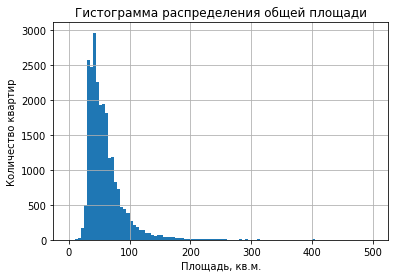

In [24]:
import matplotlib.pyplot as plt
data['total_area'].hist(bins=100, range=(0, 500))
plt.title('Гистограмма распределения общей площади')
plt.xlabel('Площадь, кв.м.')
plt.ylabel('Количество квартир')
plt.show()

In [25]:
# import matplotlib.pyplot as plt
# data['total_area'].hist(bins=100, range=(0, 500))
# plt.title('Гистограмма распределения общей площади')
# plt.xlabel('Площадь, кв.м.')
# plt.ylabel('Количество квартир')
# plt.show()

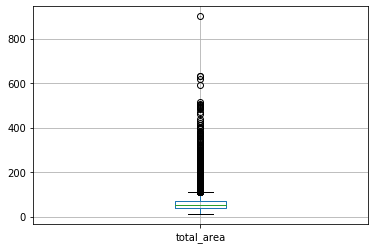

In [26]:
data.boxplot('total_area')

На гистограмме видно, что площать большинства квартир составляет от 12 до 100 квадратных метров. Медианное значение – 52 кв. м. Имеется большое количество значений, выходящих за пределы нормального распределения,т.е. выбросов, что видно на диаграмме рахмаха. 

2. Цена на момент снятия с публикации

In [27]:
data['last_price'].describe().round()

count        23699.0
mean       6541549.0
std       10887013.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6800000.0
max      763000000.0
Name: last_price, dtype: float64

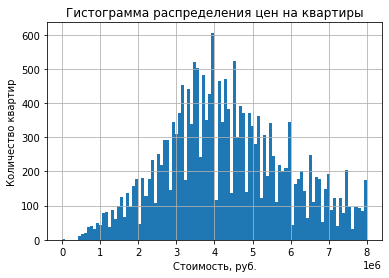

In [28]:
data['last_price'].hist(bins=100, range=(100, 8_000_000))
plt.ticklabel_format(axis='x', scilimits=(6, 6))
plt.title('Гистограмма распределения цен на квартиры')
plt.xlabel('Стоимость, руб.')
plt.ylabel('Количество квартир')
plt.show()

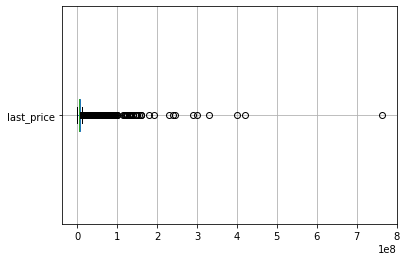

In [29]:
data.boxplot('last_price', vert=False)

Значения на гистограмме соответствуют нормальному распределению. Медиальная стоимость недвижимость – 4,65 млн. руб. В среднем квартиры стоят от 3,4 до 6,8 млн. рублей. На диграмме размаха видно большое количество выбросов.

3. Количество комнат

In [30]:
data['rooms'].describe().round()

count    23699.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

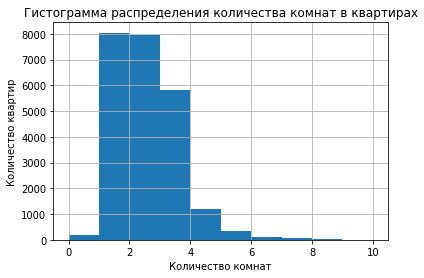

In [31]:
data['rooms'].hist(bins=10, range=(0, 10))
plt.title('Гистограмма распределения количества комнат в квартирах')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

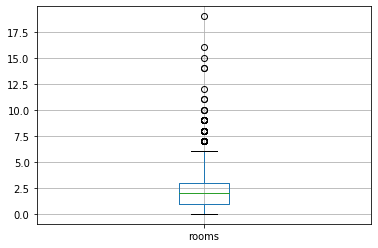

In [32]:
data.boxplot('rooms')

В большем объеме на рынке недвижимости представлены однокомнатные, двухкомнатные и трехкомнатные квартиры. Немного реже встречаются четырехкомнатные. Есть небольшое количество квартир с большим количеством комнат.

4. Высота потолка

In [33]:
data['ceiling_height'].describe().round()

count    23543.0
mean         3.0
std          0.0
min          1.0
25%          3.0
50%          3.0
75%          3.0
max         14.0
Name: ceiling_height, dtype: float64

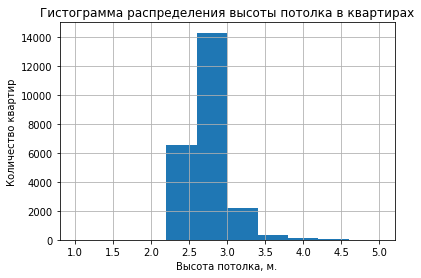

In [34]:
data['ceiling_height'].hist(bins=10, range=(1, 5))
plt.title('Гистограмма распределения высоты потолка в квартирах')
plt.xlabel('Высота потолка, м.')
plt.ylabel('Количество квартир')
plt.show()

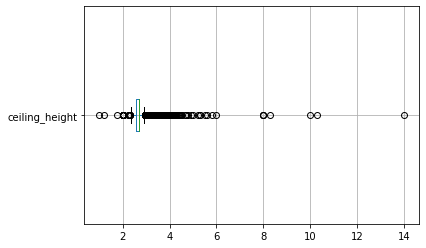

In [35]:
data.boxplot('ceiling_height', vert=False)

5. Длительность объявления: от публикации до продажи

In [36]:
data['days_exposition'].describe().round()

count    20518.0
mean       181.0
std        220.0
min          1.0
25%         45.0
50%         95.0
75%        232.0
max       1580.0
Name: days_exposition, dtype: float64

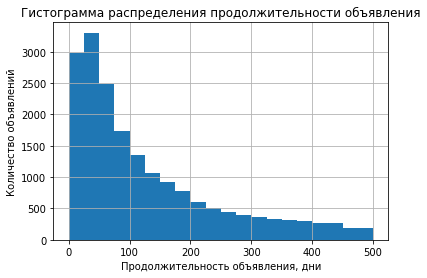

In [37]:
data['days_exposition'].hist(bins=20, range=(0, 500))
plt.title('Гистограмма распределения продолжительности объявления')
plt.xlabel('Продолжительность объявления, дни')
plt.ylabel('Количество объявлений')
plt.show()

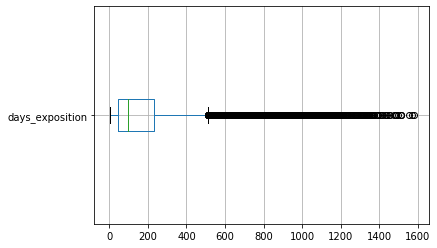

In [38]:
data.boxplot('days_exposition', vert=False)

In [39]:
days_exposition_perc25 = data['days_exposition'].quantile(0.25)
days_exposition_perc75 = data['days_exposition'].quantile(0.75)

In [40]:
IQR_days_exposition = days_exposition_perc75 - days_exposition_perc25
days_exposition_extreme_points_0 = days_exposition_perc25 - 1.5*IQR_days_exposition
days_exposition_extreme_points_1 = days_exposition_perc75 + 1.5*IQR_days_exposition
data = data.query('days_exposition < @days_exposition_extreme_points_1')

Значения на гистограмме соответствуют распределению Пуассона. На гистограмме также видно, что наибольшее количество продаж происходят в периоде от 0 до 150 дней. Однако диаграмма размаха указывает, что нормальный срок продажи квартиры от 0 до 318 дней. Если продажа длилась меньше, чем за сутки, то продажа считается слишком быстрой, если дольше 318 дней, т.е. 10,5 месяцев, – слишком долгой.

6. Редкие и выбивающиеся значения

In [41]:
#Минимальный законодательно разрешенный размер квартиры (в т.ч. студии) 24 кв. м. поэтому все, что меньше, маловероятно
data = data.query('total_area >= 24 and total_area <=250')

In [42]:
#Проверила стоимость квартир в СПб, нашла даже за 500 тысяч. 
#Они наверняка не в лучшем состоянии, но все же
data = data.query('last_price >= 500000')

In [43]:
data.sort_values(by='rooms', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_metre,day_of_week,month,year,floor_category,living_area_ratio,kitchen_area_ratio,total_area_ratio
20829,6,28659000,245,2016-03-31,14,2.70,4,168,2,NaN,...,118.0,95.0,116975,Thursday,3,2016,другой,0.685714,0.102041,0.787755
18119,4,15500000,216,2016-07-04,10,3.15,5,161,2,NaN,...,NaN,11.0,71759,Monday,7,2016,другой,0.745370,0.087963,0.833333
8860,12,17000000,235,2018-07-14,9,3.00,6,0,3,NaN,...,NaN,90.0,72340,Saturday,7,2018,другой,0.000000,0.000000,0.000000
12447,8,19900000,210,2016-04-18,8,3.30,5,144,2,NaN,...,NaN,102.0,94761,Monday,4,2016,другой,0.685714,0.109524,0.795238
17203,2,35300000,235,2018-11-15,8,4.00,4,162,3,NaN,...,50.0,7.0,150212,Thursday,11,2018,другой,0.689362,0.110638,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074,18,3500000,28,2017-07-10,0,2.65,25,20,17,NaN,...,NaN,28.0,125000,Monday,7,2017,другой,0.714286,0.000000,0.714286
21425,4,2700000,25,2018-01-01,0,2.70,24,18,19,NaN,...,NaN,5.0,108000,Monday,1,2018,другой,0.720000,0.000000,0.720000
22246,6,3100000,27,2018-05-29,0,2.70,16,23,15,NaN,...,NaN,59.0,114814,Tuesday,5,2018,другой,0.851852,0.000000,0.851852
21111,13,2050000,28,2018-03-01,0,2.80,12,18,5,NaN,...,NaN,160.0,73214,Thursday,3,2018,другой,0.642857,0.000000,0.642857


In [44]:
ceiling_height_perc25 = data['ceiling_height'].quantile(0.25)
ceiling_height_perc75 = data['ceiling_height'].quantile(0.75)

IQR_ceiling_height = ceiling_height_perc75 - ceiling_height_perc25
ceiling_height_extreme_points_0 = ceiling_height_perc25 - 1.5*IQR_ceiling_height
ceiling_height_extreme_points_0


2.3249999999999993

In [45]:
#Убираю значения ниже 2,3 метра и выше 8 метров (например, если это дюплекс и на каждом этаже высота потолка 4 метра)
data = data.query('ceiling_height > @ceiling_height_extreme_points_0 and ceiling_height <= 8')

7. Зависимость цены от площади

In [46]:
data['last_price'].corr(data['total_area'])

0.6591781306137912

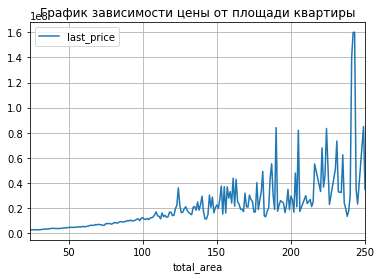

In [47]:
(data
        .pivot_table(index='total_area', values='last_price', aggfunc='mean')
        .plot(grid=True, title='График зависимости цены от площади квартиры')
)

Коэффициент корреляции 0,66 – слабая зависимость между стоимостью квартиры и ее площадью. На графике видно, что с увеличением площади, растет цена. Зависимость цены от общей площади есть, но линия стоимости квартиры скачет, возможно это также зависит от состояния и расположения квартиры.

8. Зависимость цены от количества комнат

In [48]:
data['last_price'].corr(data['rooms'])

0.3883567973966845

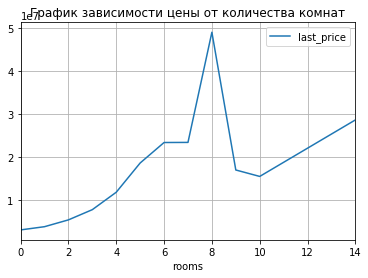

In [49]:
(data
        .pivot_table(index='rooms', values='last_price', aggfunc='mean')
        .plot(grid=True, title='График зависимости цены от количества комнат')
)

Коэффициент Пирсена – 0,39, т.е. зависимость между стоимостью и количеством комнат слабая. На графике видно, что стоимость растет с увеличением комнат до 8. Последующее резкое падение можно объяснить, либо расположением квартиры в далеке от города и большим количеством комнат, либо состоянием квартиры.

9. Зависимость цены от расстояния до центра

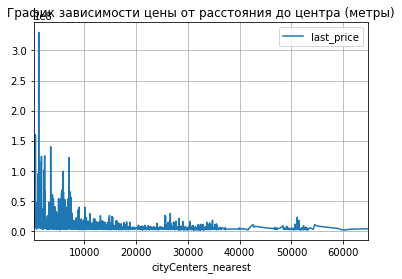

In [50]:
(data
        .pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean')
        .plot(grid=True, title='График зависимости цены от расстояния до центра (метры)')
)

Чем ближе к центру, тем дороже стоимость жилья. На графике есть небольшие всплески по удаленности от центра. Это можно объяснить расположением квартиры в крупных населенных пунктах с развитой инфраструктурой и небольшой удаленностью от города. 

10. Зависимость цены от этажа

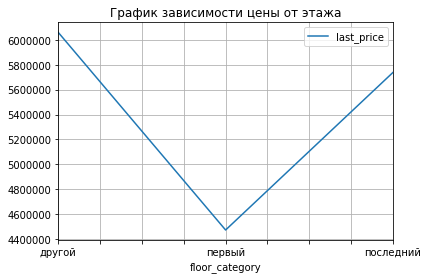

In [51]:
(data
        .pivot_table(index='floor_category', values='last_price', aggfunc='mean')
        .plot(grid=True, title='График зависимости цены от этажа')
)

Наблюдается зависимость цены квартиры от этажа. Самая низкая стоимость квартир, расположенных на 1 этаже. Самая высокая – на этах между 2 и предпоследним. Последний этаж тоже стоит дороже, но меньше, чем на других этажах. Это может быть связано с отсутствием лифта или общим состоянием дома (вдруг там протекает крыша?). 

11. Зависимость цены от дня размещения объявления

11.1 Зависимость цены от дня недели размещенного объявления

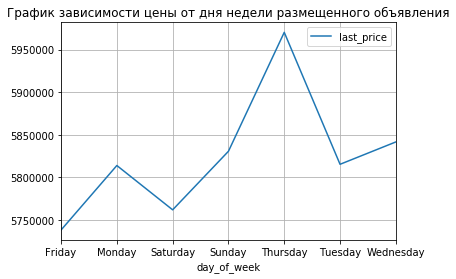

In [52]:
(data
        .pivot_table(index='day_of_week', values='last_price', aggfunc='mean')
        .plot(grid=True, title='График зависимости цены от дня недели размещенного объявления')
)

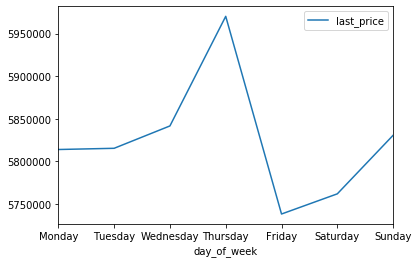

In [145]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_temp = data.pivot_table(index='day_of_week', values='last_price', aggfunc='mean').round().reset_index()
data_temp['day_of_week'] = pd.Categorical(data_temp['day_of_week'], categories=cats, ordered=True)
data_temp = data_temp.sort_values('day_of_week') 
data_temp.plot(x='day_of_week', y='last_price')

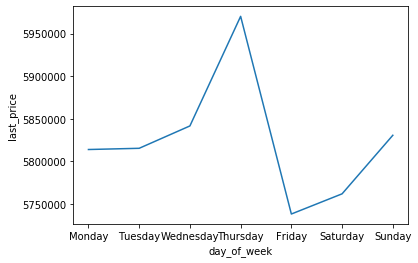

In [146]:
import seaborn as sns
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_temp = data.pivot_table(index='day_of_week', values='last_price', aggfunc='mean').round().reset_index()
data_temp['day_of_week'] = pd.Categorical(data_temp['day_of_week'], categories=cats, ordered=True)
sns.lineplot(x='day_of_week', y='last_price', data=data_temp)

Хоть график идет и не по порядку, видно, что стоимость квартиры увеличивается с понедельника по четверг и падает в пятницу. Затем растет с субботы до воскресенья и снова падает к понедельницу. Лучший день недели для размещения объявления о продаже квартиры – четверг. 

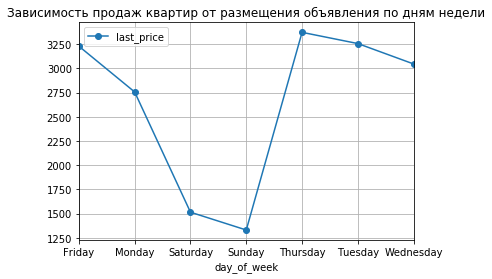

In [53]:
#Зависимость продаж квартир от размещения объявления по дням недели
(data
        .pivot_table(index='day_of_week', values='last_price', aggfunc='count')
        .plot(grid=True, style='o-', title='Зависимость продаж квартир от размещения объявления по дням недели')
)

Изходя из количества проданных квартир по дням недели размещенных объявлений, чаще всего покупают квартиры, объявления о которых размещены в четверг и пятницу. Поскольку в пятницу чаще продаются квартиры с низкой ценой, лучший день для объявления – четверг.

11.2 Зависимость цены от месяца размещенного объявления

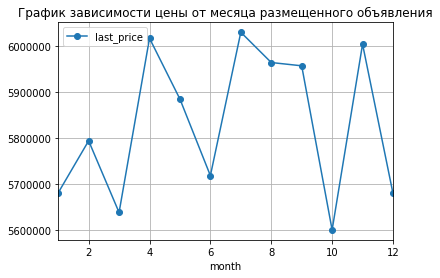

In [54]:
(data
        .pivot_table(index='month', values='last_price', aggfunc='mean')
        .plot(grid=True, style='o-', title='График зависимости цены от месяца размещенного объявления')
)

На графике видны пики стоимости квартир: апрель, июль, август, сентябрь, ноябрь. В эти месяцы покупают самые дорогие квартиры. В январе, марте, июне, октябре и декабре покупают самые дешевые квартиры.

11.3 Зависимость цены от года, когда было размещено объявление о продаже квартиры

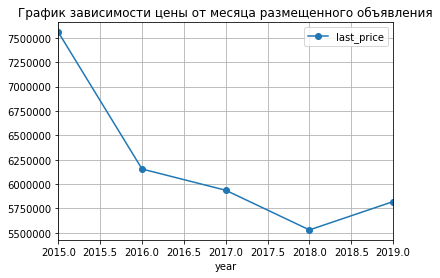

In [55]:
(data
        .pivot_table(index='year', values='last_price', aggfunc='mean')
        .plot(grid=True, style='o-', title='График зависимости цены от месяца размещенного объявления')
)

Согласно графику, средняя стоимость покупаемых квартир с 2015 года резко упала (на 1,25 млн.). Падение было вплоть до 2018 года. С тех пор ср. стоимость покупки квартир растет. Стоимость квартир здесь зависит от многих факторов: от инфляции, роста доходов до курса рубля по отношению к иностранной валюте.

12. Топ-10 городов и поселков по количеству объявлений

In [56]:
locality_pivot_table = data.pivot_table(
    index = 'locality_name',
    values = 'price_per_metre',
    aggfunc = ['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,12349,111408.987367
посёлок Мурино,470,86257.870213
посёлок Шушары,384,77958.351562
Всеволожск,304,69004.223684
Колпино,292,74852.595890
посёлок Парголово,288,89652.086806
Пушкин,275,102336.370909
деревня Кудрово,261,93018.103448
Гатчина,244,68337.221311


Самое большое количество объявлений в Санкт-Петербурге, самое меньшее – в Выборге.

In [57]:
locality_price_pivot_table = locality_pivot_table.sort_values('mean', ascending = False).head(10)
locality_price_pivot_table

#Ниже представлена информация по ср. стоимости 1 кв. метра

,count,mean
locality_name,,
Санкт-Петербург,12349,111408.987367
Пушкин,275,102336.370909
деревня Кудрово,261,93018.103448
посёлок Парголово,288,89652.086806
посёлок Мурино,470,86257.870213
посёлок Шушары,384,77958.351562
Колпино,292,74852.595890
Всеволожск,304,69004.223684
Гатчина,244,68337.221311


Самый дорогой кв. метр в Санкт-Петербурге (111,4 тысяч руб. за кв. метр), самый дешевый – в Выборге (56,9 тысяч руб. за кв. метр). То есть в 2 раза меньше, чем в СПб.

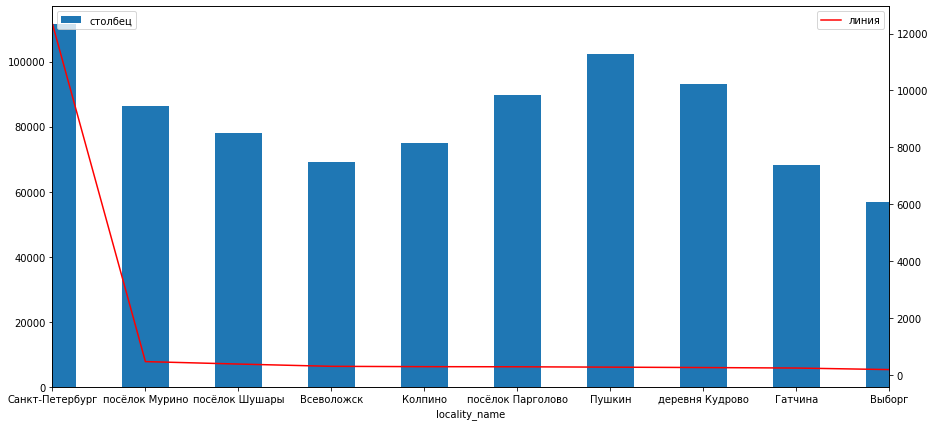

In [58]:
ax1 = locality_pivot_table['mean'].plot(kind='bar', figsize = (15,7), label = 'столбец')
ax2 = locality_pivot_table['count'].plot(secondary_y = True, color = 'red', label = 'линия')
 
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
 
plt.show()

#График топ-10 городов и поселков по количеству объявлений (красная линия)
#Средняя стоимость квадратного метра (синяя гистограмма). 

13. Центр Санкт-Петербурга

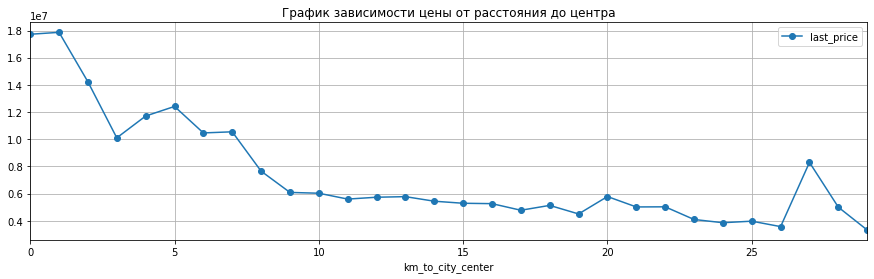

In [59]:
spb = data.query('locality_name == "Санкт-Петербург"').copy()
spb = spb.dropna(subset=['cityCenters_nearest'])
spb['km_to_city_center'] = (spb['cityCenters_nearest'] / 1000).astype('int')
spb_km = spb.pivot_table(index='km_to_city_center', values='last_price')
spb_km.plot(grid=True, title='График зависимости цены от расстояния до центра',figsize=(15, 4), style='o-')

In [60]:
spb_km.round()

,last_price
km_to_city_center,
0,17724793.0
1,17865458.0
2,14223619.0
3,10103871.0
4,11708813.0
5,12414580.0
6,10466220.0
7,10548634.0
8,7655447.0


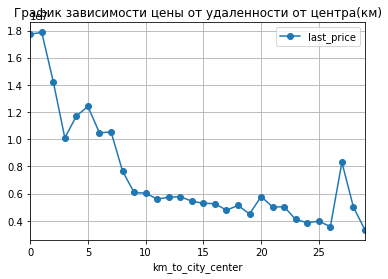

In [61]:
spb_km.plot(grid=True, style='o-', title='График зависимости цены от удаленности от центра(км)')

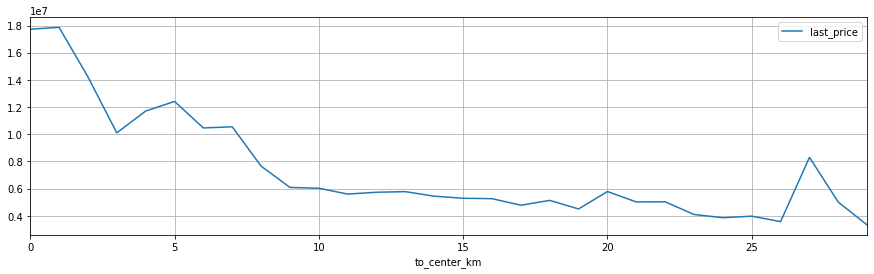

In [62]:
# Выделим в отдельную таблицу квартиры в Санкт-Петербурге
df_piter = data.query('locality_name == "Санкт-Петербург"').copy()
# Удалим строки с пропусками в расстоянии до центра
df_piter = df_piter.dropna(subset=['cityCenters_nearest'])
# Добавим столбец с расстоянием до центра города в километрах и округлим
df_piter['to_center_km'] = (df_piter['cityCenters_nearest'] / 1000).astype('int')
# Создадим сводную таблицу, где индексы это колиечство километров от центра, а значения - средние значения цены. По 
# таблице построим график
df_piter.pivot_table(index='to_center_km', values='last_price').plot(grid=True, figsize=(15, 4))

Самые дорогие квартиры размещены в диаметре 7 км. от центра

14. Сравнение продаж квартир из центра с данными по всему Санкт-Петербургу

- Средняя площадь квартиры

In [63]:
spb_center = spb.query('km_to_city_center <= 7')

In [64]:
spb_center['total_area'].describe().round()

count    2588.0
mean       82.0
std        41.0
min        24.0
25%        53.0
50%        73.0
75%        99.0
max       250.0
Name: total_area, dtype: float64

In [65]:
spb['total_area'].describe().round()

count    12326.0
mean        60.0
std         29.0
min         24.0
25%         41.0
50%         52.0
75%         70.0
max        250.0
Name: total_area, dtype: float64

Площадь квартир в центре варьируется от 24 до 250 кв. метров. В среднем – 73 кв. м. В сравнении с данными по всему СПб, средняя площадь квартир в центре больше на 20 кв. м.

- Средняя цена

In [66]:
spb_center['last_price'].describe().round()

count         2588.0
mean      12045983.0
std       14269418.0
min        1600000.0
25%        6211250.0
50%        8452500.0
75%       12600000.0
max      330000000.0
Name: last_price, dtype: float64

In [67]:
spb['last_price'].describe().round()

count        12326.0
mean       6980365.0
std        7542471.0
min        1200000.0
25%        4100000.0
50%        5200600.0
75%        7478750.0
max      330000000.0
Name: last_price, dtype: float64

Стоимость квартир в центре варьируется от 6,2 до 330 млн. рублей. Средняя стоимость квартир в центре составляет 8,5 млн. рублей. В сравнении с данными по всему СПб, средняя стоимость квартир в центре больше на 3,2 млн. рублей.

- Количество комнат

In [68]:
spb_center['rooms'].describe()

count    2588.000000
mean        2.653787
std         1.263167
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        14.000000
Name: rooms, dtype: float64

In [69]:
spb['rooms'].describe()

count    12326.000000
mean         2.073422
std          1.035615
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

Количество комнат в центре варьируется от 0 (студия) до 14. Среднее количество комнат – 3. На одну комнату больше, чем во всем Санкт-Петербурге.

- Высота потолков

In [70]:
spb_center['ceiling_height'].describe()

count    2588.000000
mean        2.913377
std         0.333379
min         2.400000
25%         2.700000
50%         2.720000
75%         3.080000
max         6.000000
Name: ceiling_height, dtype: float64

In [71]:
spb['ceiling_height'].describe()

count    12326.000000
mean         2.724738
std          0.223477
min          2.400000
25%          2.600000
50%          2.700000
75%          2.700000
max          8.000000
Name: ceiling_height, dtype: float64

В центре средняя высота потолков 2,7 метра. Такой же результат по всему Санкт-Петербургу. В центре максимальная высота потолка – 6 метров, а во всем СПб – 8 метров.

15. Зависимость цены квартир в центре от количества комнат

In [72]:
spb_center['rooms'].corr(data['total_area'])

0.7866168491504614

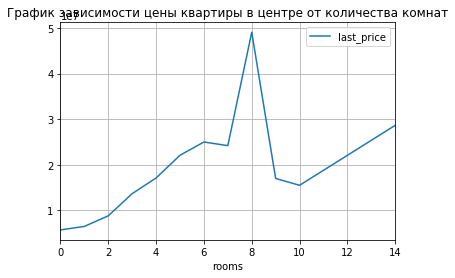

In [73]:
(spb_center
        .pivot_table(index='rooms', values='last_price', aggfunc='mean')
        .plot(grid=True, title='График зависимости цены квартиры в центре от количества комнат')
)

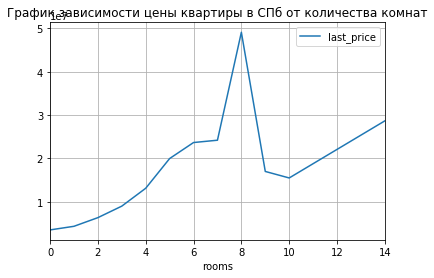

In [74]:
(spb
        .pivot_table(index='rooms', values='last_price', aggfunc='mean')
        .plot(grid=True, title='График зависимости цены квартиры в СПб от количества комнат')
)

Есть зависимость стоимости квартиры в центре от количества комнат. В целом график похож на значения по всему Санкт-Петербургу. Наиболее дорогие квартиры с 8 или 14 комнатами. 

16. Зависимость цены квартир в центре от этажа

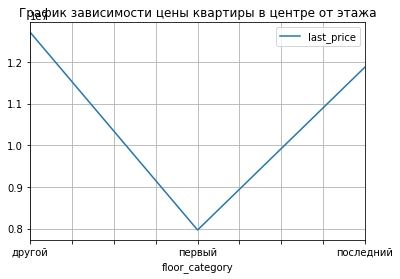

In [75]:
(spb_center
        .pivot_table(index='floor_category', values='last_price', aggfunc='mean')
        .plot(grid=True, title='График зависимости цены квартиры в центре от этажа')
)

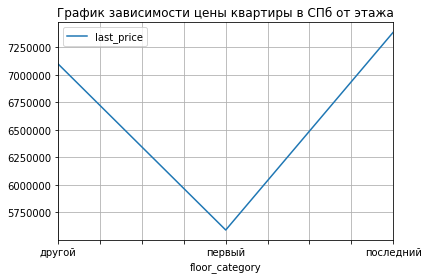

In [76]:
(spb
        .pivot_table(index='floor_category', values='last_price', aggfunc='mean')
        .plot(grid=True, title='График зависимости цены квартиры в СПб от этажа')
)

Квартиры в центре дороже со второго до предпоследнего этажа. По всему СПб самые дорогие квартиры со 2 по последний этаж.

17. Зависимость цены от удаленности от центра

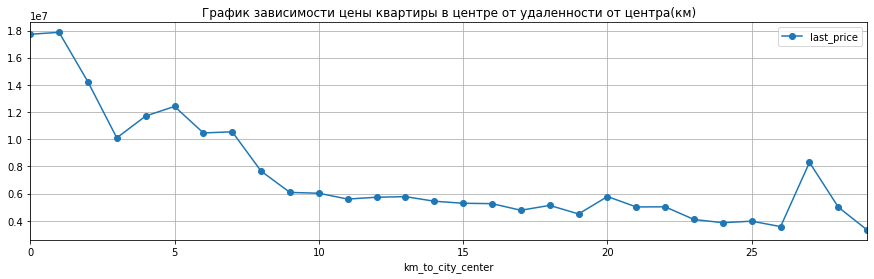

In [77]:
spb_center_to_km = spb_km.pivot_table(index='km_to_city_center', values='last_price')

spb_center_to_km.plot(grid=True, style='o-', title='График зависимости цены квартиры в центре от удаленности от центра(км)', figsize=(15, 4))

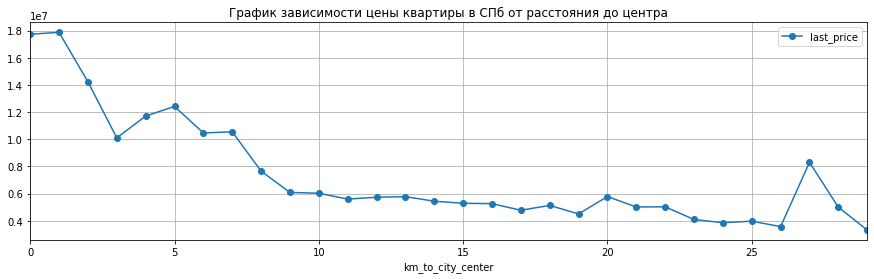

In [78]:
spb_km.plot(grid=True, title='График зависимости цены квартиры в СПб от расстояния до центра',figsize=(15, 4), style='o-')

График идентичен значениям по всему СПб. Стоимость квартиры падает по удаленности от центра.

18. Зависимость цены квартиры в центре от даты публикации

18.1 Зависимость цены от дня недели размещенного объявления

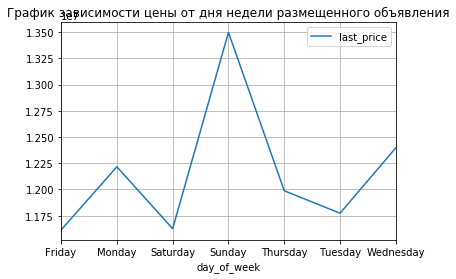

In [79]:
(spb_center
        .pivot_table(index='day_of_week', values='last_price', aggfunc='mean')
        .plot(grid=True, title='График зависимости цены от дня недели размещенного объявления')
)

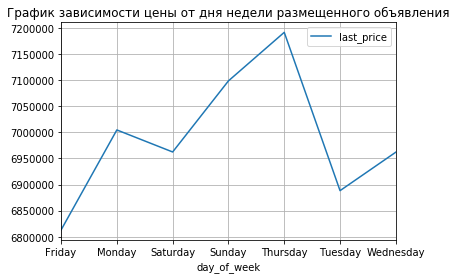

In [80]:
(spb
        .pivot_table(index='day_of_week', values='last_price', aggfunc='mean')
        .plot(grid=True, title='График зависимости цены от дня недели размещенного объявления')
)

Самые дорогие квартиры в центре продаются в воскресенье, самые дешевые – в пятницу субботу. Что касается стоимости квартир во всем СПб, самые дорогие квартиры  продаются в четверг, а самые дешевые – в пятницу. 

18.2 Зависимость цены от месяца размещенного объявления

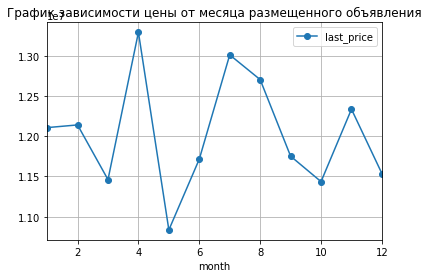

In [81]:
(spb_center
        .pivot_table(index='month', values='last_price', aggfunc='mean')
        .plot(grid=True, style='o-', title='График зависимости цены от месяца размещенного объявления')
)

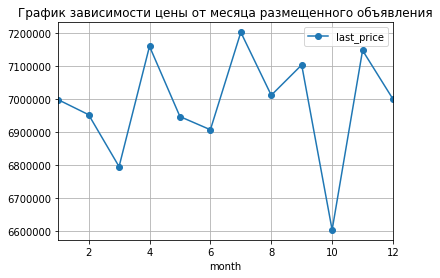

In [82]:
(spb
        .pivot_table(index='month', values='last_price', aggfunc='mean')
        .plot(grid=True, style='o-', title='График зависимости цены от месяца размещенного объявления')
)

Самые дорогие квартиры в центре покупаются в апреле, июле и августе, самые дешевые – в мае. Что касается статистики по всему СПб, самые дорогие квартиры продаются в апреле, июле, сентябре и ноябре, самые дешевые – в октябре.

18.3 Зависимость цены от года размещенного объявления

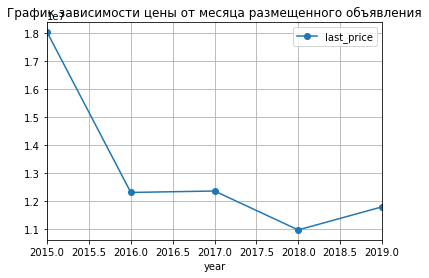

In [83]:
(spb_center
        .pivot_table(index='year', values='last_price', aggfunc='mean')
        .plot(grid=True, style='o-', title='График зависимости цены от месяца размещенного объявления')
)

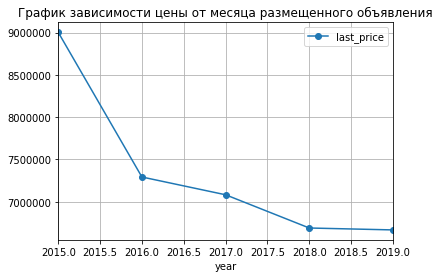

In [84]:
(spb
        .pivot_table(index='year', values='last_price', aggfunc='mean')
        .plot(grid=True, style='o-', title='График зависимости цены от месяца размещенного объявления')
)

Стоимость квартир в центре упала с 2016 по 2018г., но с тех пор постепенно растет. По стоимости квартир по всему Санкт-Петербургу с 2015 г. есть тенденция к падению. 

### Шаг 5. Общий вывод

Были исследованы возможные зависимости от стоимости недвижимости: общая площадь, этаж, расстояние до центра, срок размещения объявления. Выявлены зависимости от общей площади, удаленности от центра, количества комнат. 
Для более точного анализа были удалены выбросы в столбцах days_exposition, total_area, last_price, rooms, ceiling_height.
Нормальный срок продажи квартиры от 0 до 318 дней. Если продажа длилась меньше, чем сутки, то продажа считается слишком быстрой, если дольше 318 дней (10,5 месяцев) – слишком долгой.
Наибольшее количество объявлений расположено в Санкт-Петербурге.Самый дорогой кв. метр в Санкт-Петербурге (111,4 тысяч руб. за кв. метр), самый дешевый – в Выборге (56,9 тысяч руб. за кв. метр). То есть в 2 раза меньше, чем в СПб.
Далее были исследованы объявления в Санкт-Петербурге. "Центральными" можно считать квартиры в 2 км от центра. Стоимость квартир в центре варьируется от 6,2 до 330 млн. рублей. Средняя стоимость квартир в центре составляет 8,5 млн. рублей. В сравнении с данными по всему СПб, средняя стоимость квартир в центре больше на 3,2 млн. рублей.
Стоимость недвижимости в центре зависит от площади, количества комнат и этажа. 
Стоимость квартир в центре упала с 2016 по 2018г., но с тех пор постепенно растет. По стоимости квартир по всему Санкт-Петербургу с 2015 г. есть тенденция к падению.